In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/titanic_train.csv")
pd.set_option('display.max_rows', None)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.columns
#Survived-Label

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()
#Need Encoding columns-sex, Embarked
#drop columns; Just for information-Name,ticket,Cabin(Not of Null Value)
#change to int65-Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()
#Age need Imputation-I prefer Deleting nan, because Age would be a very important parameter for influencing Survival rate

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Encoding Done

from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

df['Embarked']=LE.fit_transform(df['Embarked'])
df['Sex']=df['Sex'].replace({'male':1, 'female':0})


char_cabin=df['Cabin'].astype(str)
new_cabin=np.array([cabin[0]for cabin in char_cabin])
df['Cabin']=new_cabin

#As there are many nan and cannot delete them,  and practically knowing this would not influence the survival rate, Encoding this column
df['Cabin']=LE.fit_transform(df['Cabin'])


In [8]:
df.info()
#deleteing missing Age details, As practically survival rate might get influenced by Age of the passanger, So decided not to impute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 80.2+ KB


In [9]:
df.dropna(subset=['Age'],inplace=True)

In [10]:
df.info()
#PassengerID, Name, Ticket do not matter for suvival/dead, As there are just Values and catogorical in this dataset, so planned to drop given for a paggender

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 69.7+ KB


In [11]:
df.drop(['Name'],inplace=True,axis=1)
df.drop(['PassengerId'],inplace=True,axis=1)
df.drop(['Ticket'],inplace=True,axis=1)
df.drop(['Cabin'],inplace=True,axis=1)

In [12]:
df.shape

(714, 8)

In [13]:
df['Survived'].value_counts()
#Feel it is balanced

0    424
1    290
Name: Survived, dtype: int64

In [14]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514,1.599440
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.781483
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,3.000000


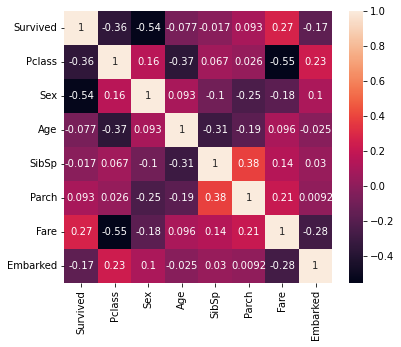

In [15]:
Corr=df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(Corr,annot=True)
plt.show()
#This Map shows that the columns are very less correlation betwee the attributes

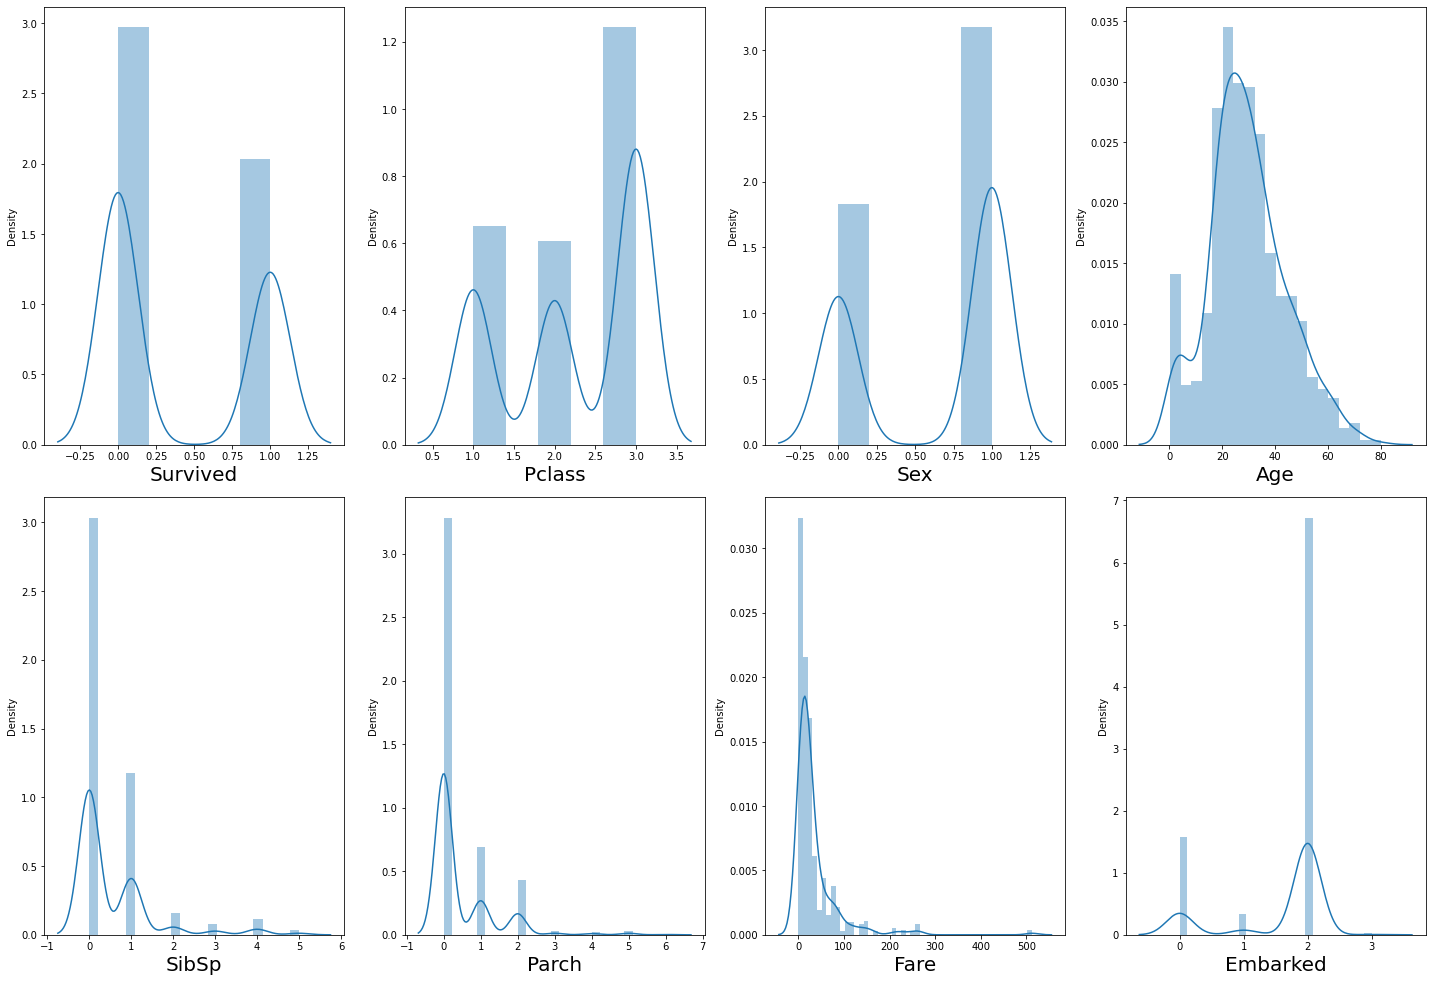

In [16]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

#Catogorical columns-Noting to do with distibution-pClass, Sex, Sibsi, Parch, Embarked
#would check for skewness for Age and fare


In [17]:
x_normalized=pd.DataFrame({})
x_normalized['Age']=df['Age']
x_normalized['Fare']=df['Fare']
x_normalized.skew().sort_values(ascending=False)
#There need a screwness correction for Fare

Fare    4.653630
Age     0.389108
dtype: float64

In [18]:
x_normalized.drop(['Age'],inplace=True,axis=1)


In [19]:
x_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [20]:
#Screwness Correction
from sklearn.preprocessing import power_transform
x_new=power_transform(x_normalized)
#x_new=pd.DataFrame(x_new,columns=['Fare'])
df['Fare']=x_new


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 47.4 KB


In [22]:
x=df.drop(columns=['Survived'],axis=1)
y=df['Survived']
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.00,1,0,-1.000198,2
1,1,0,38.00,1,0,1.282535,0
2,3,0,26.00,0,0,-0.903851,2
3,1,0,35.00,1,0,1.019036,2
4,3,1,35.00,0,0,-0.886930,2
6,1,1,54.00,0,0,0.997495,2
7,3,1,2.00,3,1,0.127394,2
8,3,0,27.00,0,2,-0.538327,2
9,2,0,14.00,1,0,0.481627,0
10,3,0,4.00,1,1,-0.111365,2


In [23]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(714, 7)

In [24]:
x_scaled.shape

(714, 7)

#Would Apply PCA technique as there is very less correlation of features with the target, Soo Principal component Analysis would reduce the dimentions of the features.
because I really do not understand which features would help me to predict, the features look very unrealted

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA()
components=pca.fit_transform(x_scaled)

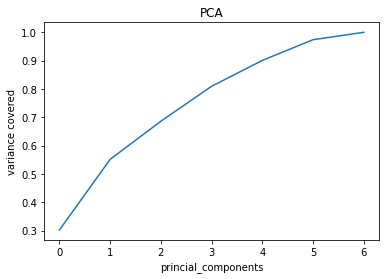

In [27]:
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('princial_components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()
#I will use all 6 componets for model building 

In [29]:
principl_component=pd.DataFrame(components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
principl_component.drop(['PC7'],inplace=True,axis=1)
principl_component

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.544817,0.722385,0.148806,0.562289,-0.350161,-0.305978
1,2.558765,-1.082396,-1.378937,0.088680,-0.427126,-0.885760
2,-1.042664,0.354486,-0.550941,-1.582335,-0.331032,-0.350517
3,1.676942,-0.519135,0.560315,-0.836231,-1.264010,-0.381623
4,-1.676054,-0.332626,0.282966,0.057822,0.282380,-0.120594
5,0.800675,-2.137497,1.427280,0.300111,-0.086725,0.122210
6,-0.027982,3.058752,0.469032,1.619644,-0.794225,-0.311461
7,-0.063088,1.354830,-0.007796,-1.749285,1.340443,0.380116
8,1.329102,0.372263,-2.310872,0.101024,-0.712172,-0.420388
9,-0.020760,2.238348,-0.556350,-0.979949,-0.534747,0.328380


In [30]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(principl_component,y,test_size=0.25, random_state=100)

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       117
           1       0.67      0.76      0.71        62

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.79      0.79       179



In [32]:
from sklearn.ensemble import BaggingClassifier
bclf=BaggingClassifier()
bclf.fit(x_train,y_train)
y_pred=bclf.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.73      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.82       179



In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       117
           1       0.63      0.73      0.68        62

    accuracy                           0.76       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.77      0.76      0.76       179



In [34]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       117
           1       0.59      0.71      0.64        62

    accuracy                           0.73       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.74      0.73      0.73       179



In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.73      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [36]:
#Will Go with SVC as its presion on both the labels is equally good.
#Hypertunning SVC

In [37]:
params={'C':[ 1, 3, 5, 7, 8,  12, 15, 18, 20],
   'gamma':[0.1, 0.4, 0.8, 1]}
GSCV=GridSearchCV(svc,params)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'C': 1, 'gamma': 0.1}

In [38]:
from sklearn.svm import SVC
svc=SVC(C=1, gamma=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.73      0.79      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.83      0.83       179



In [39]:
#svc.get_params().keys()

In [40]:
with open("svc", "wb") as f:
    pickle.dump(svc, f)